# **IMPORT FORMATTED DATA**

In [3]:
!pip install rake-nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
original_path = "data.txt"
text = open(original_path)
text = text.readlines()
data = ""
for i in text:
  data += i
print(data)

Basic Notes
Anng
10/9/12
Study Tips
- Prepare before class
  - Review notes from last class
  - Look through chapter to understand basic idea of this class
  - May take 20-30 mins but makes a huge difference
- When in doubt, write it down
  - Point: write everything through Main Points Main Ideas
  - Don't spend too long deciding if you should write down
- Thin your notes
  - Don't write everything. Leave out words.
  - Use abbreviations - include a key of specific-for-this lecture abbreviations. e.g., A lecture about King Henry VIII will require you to repeat his name several times. Instead of writing it out each time, make a note: King Henry 
VIII = H8. For that would be confused with King Henry VII, abbreviate it as King Henry VIII = 8.
- Know your prof
  - Use the note-taking method that will best help you with this particular prof's lectures.
  - A more organized prof works well with the Cornell style. Use the note-taking method for visual learners for a prof that jumps around and

# **DATA PROCESSING**

In [5]:
def replace_bullet_points(text):
    indent = 0
    space = 0
    replaced_lines = []
    for i in text:
      if i == "-":
          # Replace the leading spaces with dashes
          text = text.replace(' ', '-', space)
          replaced_lines.append(text)
      elif i == " ":
          space += 1
      else:
        break
    return '\n'.join(replaced_lines)

In [6]:

text_filename = "transformed_text.txt"
with open(text_filename, "w") as file:
  for line in text:
      if line.strip().startswith('-'):
        new_line = replace_bullet_points(line)
        file.write(new_line)
      else:
        file.write(line)

transformed_text.txt

```
Basic Notes
Anng
10/9/12
Study Tips
- Prepare before class
--- Review notes from last class
--- Look through chapter to understand basic idea of this class
--- May take 20-30 mins but makes a huge difference
- When in doubt, write it down
--- Point: write everything through Main Points Main Ideas
--- Don't spend too long deciding if you should write down
- Thin your notes
--- Don't write everything. Leave out words.
--- Use abbreviations - include a key of specific-for-this lecture abbreviations. e.g., A lecture about King Henry VIII will require you to repeat his name several times. Instead of writing it out each time, make a note: King Henry
VIII = H8. For that would be confused with King Henry VII, abbreviate it as King Henry VIII = 8.
- Know your prof
--- Use the note-taking method that will best help you with this particular prof's lectures.
--- A more organized prof works well with the Cornell style. Use the note-taking method for visual learners for a prof that jumps around and returns to previous points.
- Show the prof your notes after the first lecture and ask if you are hitting main points.
```





# **RAKE NLTK MODEL**

In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
from rake_nltk import Rake
import re
from IPython.core.display import display, HTML

In [ ]:
def capitalize_first_letter(match,keyword):
    matched_word = match.group(0)
    if matched_word.lower() == keyword.lower():  # Check if the matched word is the keyword itself
        return matched_word
    elif matched_word[0].isupper():  # Check if the first letter is already capitalized
        return matched_word
    else:
        return matched_word.capitalize()

In [ ]:
def highlight_keywords(text):
    highlighted_strings = []
    r = Rake()
    for line in text:
        # Extract keywords using rake_nltk
        r.extract_keywords_from_text(line)
        keywords = r.get_ranked_phrases()

        # Replace keywords with HTML span tags for highlighting while preserving capitalization
        highlighted_string = line
        for keyword in keywords:
            highlighted_string = re.sub(r'\b{}\b'.format(re.escape(keyword)), lambda x: '<span style="background-color: yellow">{}</span>'.format(capitalize_first_letter(x,keyword)), highlighted_string, flags=re.IGNORECASE)

        highlighted_strings.append(highlighted_string)

    # Combine highlighted strings into HTML
    combined_html = '<br>'.join(highlighted_strings)

    return highlighted_strings

In [ ]:
result = highlight_keywords(open("transformed_text.txt").readlines())

In [ ]:
file_path = "output.html"
with open(file_path, "w") as file:
  curr_num = 0
  prev_num = 0
  fixed_distance = 0

  for line_str in result:

    if line_str.startswith("-"):
      for i in line_str:
        if i == "-":
          curr_num += 1
        else:
          break

      if curr_num == prev_num:
        line_str = line_str.replace("-", "", curr_num)
        line_str = "<li>" + line_str + "</li>"
        file.write(HTML(line_str).data)

      elif curr_num > prev_num:
        fixed_distance = curr_num - prev_num
        file.write("<ul>")
        line_str = line_str.replace("-", "", curr_num)
        line_str = "<li>" + line_str + "</li>"
        file.write(HTML(line_str).data)


      else:
        distance = prev_num - curr_num
        while distance >= fixed_distance:
          file.write("</ul>")
          distance -= 1
        line_str = line_str.replace("-", "", curr_num)
        line_str = "<li>" + line_str + "</li>"
        file.write(HTML(line_str).data)

      prev_num = curr_num
      curr_num = 0

    else:
      while prev_num > 0:
        file.write("</ul>")
        prev_num -= 1

      file.write(HTML(line_str).data)
      file.write("<br>")


output.html

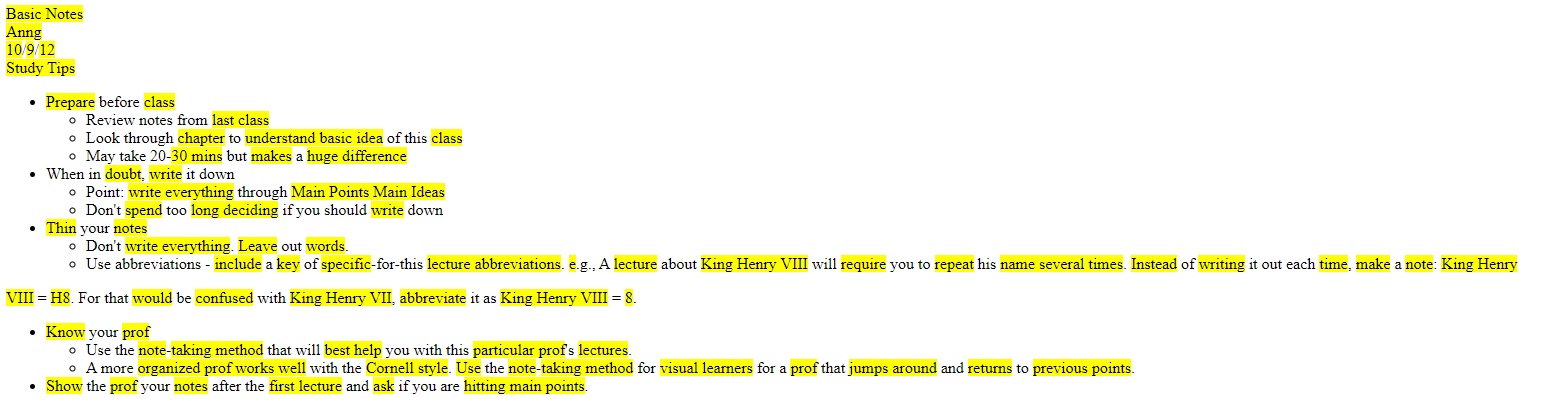